# **Predicting Delivery Time**
A cognitive application  for Logistics using Neural  Network

In [1]:
# Install libraries (if not available in Colab)
!pip install matplotlib seaborn tensorflow


Import Required Libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import ipywidgets as widgets


Load and Prepare Data

In [3]:
# Load the Keras Boston Housing dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data()

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check data
print("Sample input features (after scaling):")
print(X_train[0])


Training data shape: (404, 13)
Test data shape: (102, 13)
Sample input features (after scaling):
[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


Build Neural Network Model

In [4]:
# Define the model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression (predicting delivery time or cost)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Show the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

Train the Model

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 588.7772 - mae: 22.4255 - val_loss: 556.5316 - val_mae: 21.8067
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 520.6776 - mae: 20.8701 - val_loss: 487.4589 - val_mae: 20.2030
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 432.7569 - mae: 18.7481 - val_loss: 396.3556 - val_mae: 17.9863
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 368.2867 - mae: 17.0167 - val_loss: 284.3253 - val_mae: 15.0435
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 246.4997 - mae: 13.6886 - val_loss: 167.5052 - val_mae: 11.3148
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 142.4821 - mae: 9.6433 - val_loss: 86.1566 - val_mae: 7.7522
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 81.1567 - mae: 6.6150 - val_loss: 56.1914 - val_mae: 5.9430
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 48.9180 - mae: 5.1159 - val_loss: 45.5447 - val_mae: 5.3539
Epoch 9/50
13/13 ━━━━━━━━━━━

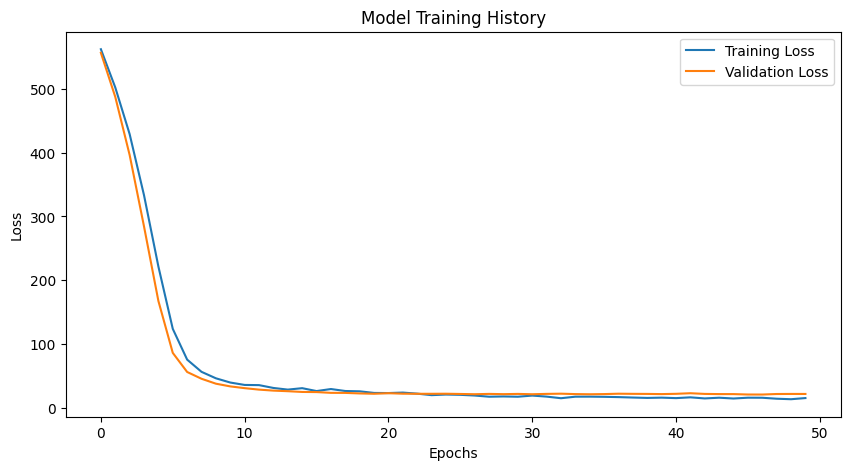

In [5]:
# Train the model with early stopping
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50, batch_size=32, verbose=1)

# Plot the training history
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Training History')
plt.show()


Simple User Interface (UI) for Predictions

In [6]:
# Widget sliders for user input
weight_slider = widgets.FloatSlider(min=0, max=50, step=0.1, description='Weight:')
distance_slider = widgets.FloatSlider(min=0, max=1000, step=10, description='Distance:')
priority_slider = widgets.Dropdown(options=['Low', 'Medium', 'High'], description='Priority:')
transport_type_slider = widgets.Dropdown(options=['Air', 'Ground', 'Sea'], description='Transport:')

# Button to trigger prediction
predict_button = widgets.Button(description="Predict Delivery Time")

# Output widget to display prediction result
output = widgets.Output()

# Prediction function
def predict_shipment_details(b):
    # Simulate input based on widget values
    weight = weight_slider.value
    distance = distance_slider.value
    priority = ['Low', 'Medium', 'High'].index(priority_slider.value)
    transport = ['Air', 'Ground', 'Sea'].index(transport_type_slider.value)

    # Construct a sample input (this is just an example, adjust as needed)
    sample_input = np.array([[weight, distance, priority, transport] + [0]*(X_train.shape[1] - 4)])
    sample_input = scaler.transform(sample_input)

    # Predict using the trained model
    prediction = model.predict(sample_input)[0][0]

    # Display the result
    with output:
        output.clear_output()
        print(f"Predicted Delivery Time: {prediction:.2f} hours")

# Bind button click event to prediction function
predict_button.on_click(predict_shipment_details)

# Display the UI
display(weight_slider, distance_slider, priority_slider, transport_type_slider, predict_button, output)


FloatSlider(value=0.0, description='Weight:', max=50.0)

FloatSlider(value=0.0, description='Distance:', max=1000.0, step=10.0)

Dropdown(description='Priority:', options=('Low', 'Medium', 'High'), value='Low')

Dropdown(description='Transport:', options=('Air', 'Ground', 'Sea'), value='Air')

Button(description='Predict Delivery Time', style=ButtonStyle())

Output()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
